In [1]:
import numpy as np
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt

In [2]:
class non_res(rv_continuous):
    def _pdf(self, x):
        return (1/2) * (x**2) * np.exp(- x) # C = 1/2 for x^2 exp(-x), C = 256 for x^2 exp(-8x)

def nonres_sig(N, rng):
    # this function can be used to generate non-resonant signal events.
    my_sig = non_res(momtype = 0, a=0, b=None, seed=rng) # momtype = 0 is pdf, a lower bound (default=-inf), b upper bound (default=+inf)
    sig_sample = my_sig.rvs(size = N)
    return sig_sample

def gaussian_sig(N, sig_loc, sig_std, rng):
    return rng.normal(loc=sig_loc, scale=sig_std, size=(N,1))

def reference_data(N,rng):
    return rng.exponential(scale=1, size=(N, 1))

def dataset_gaussian(R,B,S,sig_loc, sig_std,seed=0):
    '''
    Parameters: R: size of the reference sample
                B: number of reference points in the data sample
                S: number of signal points in the data sample
                sig_loc: mean of gaussian signal
                sig_std: std of gaussian signal
                seed: for reproducibility

    Returns:    dataset: (R+B+S)x1 numpy array with reference sample concatenated to data
                target: (R+B+S)x1 numpy array with labels (0 for reference, 1 for data)
    '''

    rng = np.random.default_rng(seed=seed)
    dataset = np.zeros(shape=(R+B+S,1))
    dataset[0:R+B] = reference_data(R+B,rng)
    dataset[R+B:] = gaussian_sig(S, sig_loc, sig_std, rng)
    target = np.zeros_like(dataset)
    target[R:] = np.ones(shape=(B+S,1))

    return dataset, target

In [3]:
# these functions return two arrays: a dataset and the associated labels
# dataset[target==0] is the reference sample
# dataset[target==1] is the data sample
# generate_null return a dataset with both reference and data following the reference distribution. it is used to estimate the null hypothesis 

def generate_null(R,B,seed=0):
    '''
    Dataset with reference only data
    '''

    rng = np.random.default_rng(seed=seed)
    dataset = rng.exponential(scale=1, size=(R+B, 1))
    target = np.zeros_like(dataset)
    target[R:] = np.ones(shape=(B,1))

    return dataset, target

def generate_np1(R,B,S,sig_loc=6.4, sig_std=0.16,seed=0):
    '''
    Peak in the tail
    '''
    return dataset_gaussian(R,B,S,sig_loc, sig_std,seed=seed)


def generate_np3(R,B,S,sig_loc=1.6, sig_std=0.16,seed=0):
    '''
    Peak in the bulk
    '''
    return dataset_gaussian(R,B,S,sig_loc, sig_std,seed=seed)


def generate_np2(R,B,S,seed=0):
    '''
    Nonresonant signal

    Parameters: R: size of the reference sample
                B: number of reference points in the data sample
                S: number of signal points in the data sample
                seed: for reproducibility

    Returns:    dataset: (R+B+S)x1 numpy array with reference sample concatenated to data
                target: (R+B+S)x1 numpy array with labels (0 for reference, 1 for data)
    '''

    rng = np.random.default_rng(seed=seed)
    dataset = np.zeros(shape=(R+B+S,1))
    dataset[0:R+B] = reference_data(R+B,rng)
    dataset[R+B:] = nonres_sig(S,rng).reshape(S,1)
    target = np.zeros_like(dataset)
    target[R:] = np.ones(shape=(B+S,1))

    return dataset, target


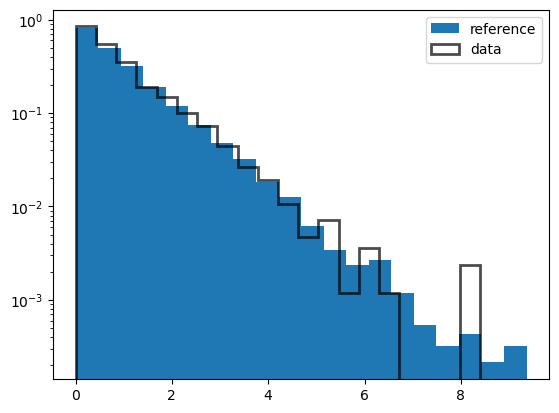

In [4]:
dataset, target = generate_null(20000,2000,seed=0)
plt.hist(dataset[target==0],bins=20,label='reference',density=True)
plt.hist(dataset[target==1],bins=20,alpha=0.7,label='data',histtype='step',edgecolor='k',lw=2,fill=False,density=True)
plt.yscale('log')
plt.legend()
plt.show()

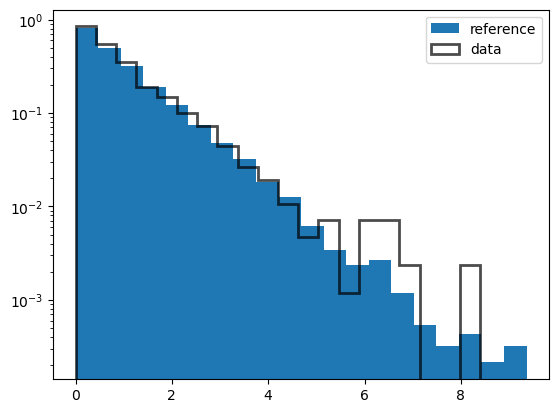

In [5]:
dataset, target = generate_np1(20000,1990,10,seed=0)
plt.hist(dataset[target==0],bins=20,label='reference',density=True)
plt.hist(dataset[target==1],bins=20,alpha=0.7,label='data',histtype='step',edgecolor='k',lw=2,fill=False,density=True)
plt.yscale('log')
plt.legend()
plt.show()

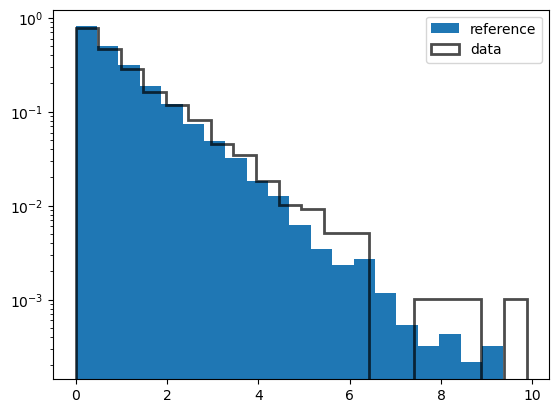

In [10]:
dataset, target = generate_np2(20000,1910,90,seed=0)
plt.hist(dataset[target==0],bins=20,label='reference',density=True)
plt.hist(dataset[target==1],bins=20,alpha=0.7,label='data',histtype='step',edgecolor='k',lw=2,fill=False,density=True)
plt.yscale('log')
plt.legend()
plt.show()

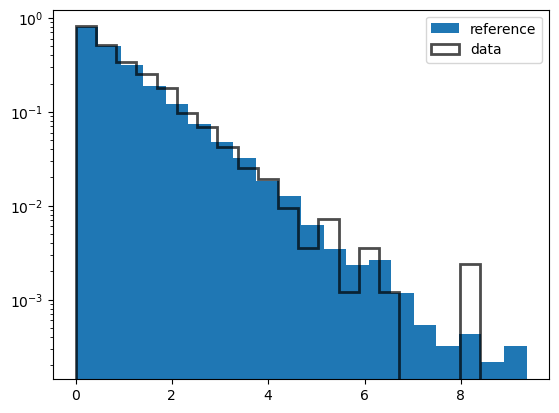

In [11]:
dataset, target = generate_np3(20000,1910,90,seed=0)
plt.hist(dataset[target==0],bins=20,label='reference',density=True)
plt.hist(dataset[target==1],bins=20,alpha=0.7,label='data',histtype='step',edgecolor='k',lw=2,fill=False,density=True)
plt.yscale('log')
plt.legend()
plt.show()